* [1. Libraries And Dataset](#1.-Libraries-And-Dataset)
  * [1.1 Libraries](#1.1-Libraries)
  * [1.2 Dataset](#1.2-Dataset)
* [2. Sentiment Analysis](#2.-Sentiment-Analysis)
* [3. Embedding Techniques](#3.-Embedding-Techniques)
* [4. Models For Lemmatized Text](#4.-Models-For-Lemmatized-Text)
  * [4.1 Tokenization And Pad Sequences](#4.1-Tokenization-and-Pad-Sequences)
  * [4.2 Split the Dataset](#4.2-Split-the-Dataset)
  * [4.3 LSTM](#4.3-LSTM)
  * [4.4 GloVe](#4.4-GloVe)
  * [4.5 TF-IDF](#4.5-TF-IDF)
  * [4.6 Word2Vec](#4.6-Word2Vec)
* [5. Classification Models For Lemmatized Text](#5.-Classification-Models-For-Lemmatized-Text)
  * [5.1 Models Using LSTM Embedding](#5.1-Models-Using-LSTM-Embedding)
      * [5.1.1 Logistic Regression](#5.1.1-Logistic-Regression)
      * [5.1.2 Random Forest](#5.1.2-Random-Forest)
      * [5.1.3 Decision Tree](#5.1.3-Decision-Tree)
      * [5.1.4 LST Model](#5.1.4-LST-Model)
  * [5.2 Models Using GloVe Embedding](#5.2-Models-Using-GloVe-Embedding)
      * [5.2.1 Logistic Regression](#5.2.1-Logistic-Regression)
      * [5.2.2 Random Forest](#5.2.2-Random-Forest)
      * [5.2.3 Decision Tree](#5.2.3-Decision-Tree)
      * [5.2.4 LST Model](#5.2.4-LST-Model)
  * [5.3. Models Using TF-IDF Embedding](#5.3-Models-Using-TF-IDF-Embedding)
      * [5.3.1 Logistic Regression](#5.3.1-Logistic-Regression)
      * [5.3.2 Random Forest](#5.3.2-Random-Forest)
      * [5.3.3 Decision Tree](#5.3.3-Decision-Tree)
      * [5.3.4 LST Model](#5.3.4-LST-Model)
  * [5.4 Models Using Word2Vec Embeddings](#5.4-Models-Using-Word2Vec-Embedding)
      * [5.4.1 Logistic Regression](#5.4.1-Logistic-Regression)
      * [5.4.2 Random Forest](#5.4.2-Random-Forest)
      * [5.4.3 Decision Tree](#5.4.3-Decision-Tree)
      * [5.4.4 LST Model](#5.4.4-LST-Model)
* [6. Models For Stemmed Text](#6.-Models-For-Stemmed-Text)
  * [6.1 Tokenization And Pad Sequences](#6.1-Tokenization-and-Pad-Sequences)
  * [6.2 Split the Dataset](#6.2-Split-the-Dataset)
  * [6.3 LSTM](#6.3-LSTM)
  * [6.4 GloVe](#6.4-GloVe)
  * [6.5 TF-IDF](#6.5-TF-IDF)
  * [6.6 Word2Vec](#6.6-Word2Vec)
* [7. Classification Models For Stemmed Text](#7.-Classification-Models-For-Stemmed-Text)
  * [7.1 Models Using LSTM Embedding](#7.1-Models-Using-LSTM-Embedding)
      * [7.1.1 Logistic Regression](#7.1.1-Logistic-Regression)
      * [7.1.2 Random Forest](#7.1.2-Random-Forest)
      * [7.1.3 Decision Tree](#7.1.3-Decision-Tree)
      * [7.1.4 LST Model](#7.1.4-LST-Model)
  * [7.2 Models Using GloVe Embedding](#7.2-Models-Using-GloVe-Embedding)
      * [7.2.1 Logistic Regression](#7.2.1-Logistic-Regression)
      * [7.2.2 Random Forest](#7.2.2-Random-Forest)
      * [7.2.3 Decision Tree](#7.2.3-Decision-Tree)
      * [7.2.4 LST Model](#7.2.4-LST-Model)
  * [7.3 Models Using TF-IDF Embedding](#7.3-Models-Using-TF-IDF-Embedding)
      * [7.3.1 Logistic Regression](#7.3.1-Logistic-Regression)
      * [7.3.2 Random Forest](#7.3.2-Random-Forest)
      * [7.3.3 Decision Tree](#7.3.3-Decision-Tree)
      * [7.3.4 LST Model](#7.3.4-LST-Model)
  * [7.4 Models Using Word2Vec Embedding](#7.4-Models-Using-Word2Vec-Embedding)
      * [7.4.1 Logistic Regression](#7.4.1-Logistic-Regression)
      * [7.4.2 Random Forest](#7.4.2-Random-Forest)
      * [7.4.3 Decision Tree](#7.4.3-Decision-Tree)
      * [7.4.4 LST Model](#7.4.4-LST-Model)

## 1. Libraries And Dataset

### 1.1 Libraries

In [1]:
#%pip freeze > requirements.txt
# os.listdir()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from langdetect import detect
from spellchecker import SpellChecker
from wordcloud import WordCloud
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer,WordNetLemmatizer
import langcodes
import nltk
import contractions
import string
from tqdm import tqdm
from langdetect.lang_detect_exception import LangDetectException

from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from torch.utils.data import Dataset, DataLoader
import torchtext.vocab as vocab
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold, cross_validate
from gensim.models import Word2Vec
import multiprocessing
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.layers import Flatten
from utils import *
import os

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('snowball_data')

c:\Users\liita\anaconda3\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\liita\anaconda3\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-d

True

In [3]:
path = os.path.abspath(os.getcwd())
data_path = os.path.join(path, 'Project Corpora','cleanData')

### 1.2 Dataset

In [4]:
df_train_clean = pd.read_csv(os.path.join(data_path, 'train_cleaned_stem_lem.csv'),index_col = 0)
df_train_reviews_clean = pd.read_csv(os.path.join(data_path, 'train_reviews_cleaned_stem_lem.csv'), index_col = 0)

df_train_merged_clean = merge_datasets(df_train_clean, df_train_reviews_clean)

## 2. Sentiment Analysis

In [5]:
df_train_merged_clean['sentiment_lem'] = df_train_merged_clean['comments_lemmitize'].apply(analyze_sentiment)
df_train_merged_clean['sentiment_stem'] = df_train_merged_clean['comments_stemming'].apply(analyze_sentiment)

In [6]:
df_train_merged_clean.head(3)

,unlisted,word_count_host,word_count_description,description_stemming,description_lemmitize,host_about_stemming,host_about_lemmitize,comments_stemming,comments_lemmitize,sentiment_lem,sentiment_stem
index,,,,,,,,,,,
5271,False,4,126,share mix room hostel share bathroomw locat st...,shared mixed room hostel shared bathroomwe loc...,alojament local registr al,alojamento local registro al,cozi comfort hous stay innev worri safeti host...,cozy comfortable house stay innever worry safe...,positive,positive
3630,True,24,23,espa fic pert parqu eduard vii saldanh estefan...,espao fica perto parque eduardo vii saldanha e...,friend host anyth quit strict hous rule,friendly host anything quit strict house rule,,,neutral,neutral
5453,True,43,167,trafaria hous cozi familiar villa facil relax ...,trafarias house cozy familiar villa facility r...,social person like communic read travel cinema...,social person liking communicate reading trave...,,,neutral,neutral


In [7]:
listed_properties_merged_sentiment = df_train_merged_clean[df_train_merged_clean['unlisted'] == 0]
unlisted_properties_merged_sentiment = df_train_merged_clean[df_train_merged_clean['unlisted'] == 1]

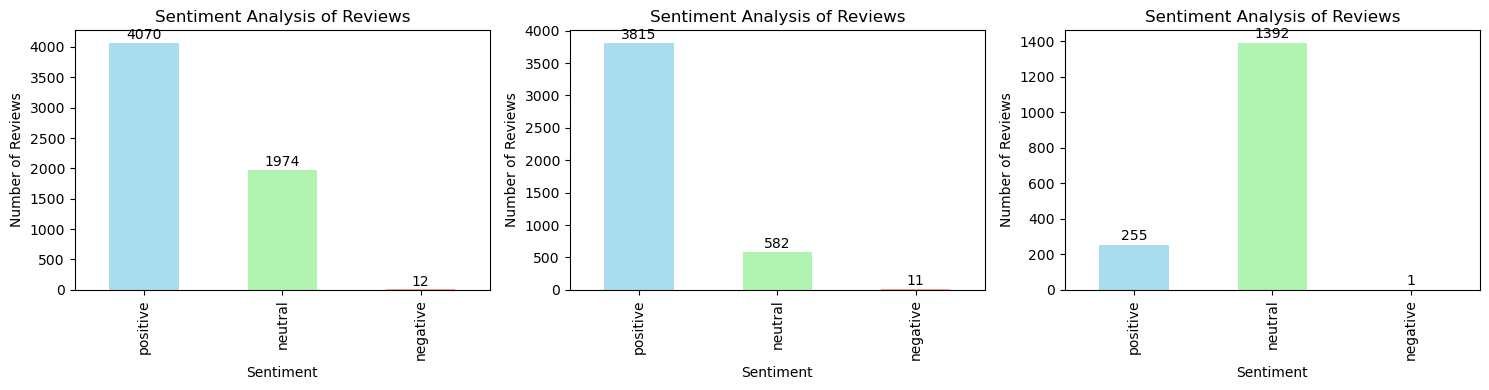

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))


sentiment_counts = df_train_merged_clean['sentiment_lem'].value_counts()
sentiment_chart(sentiment_counts, axs[0])

sentiment_counts = listed_properties_merged_sentiment['sentiment_lem'].value_counts()
sentiment_chart(sentiment_counts, axs[1])

sentiment_counts = unlisted_properties_merged_sentiment['sentiment_lem'].value_counts()
sentiment_chart(sentiment_counts, axs[2])

plt.tight_layout()
plt.show()

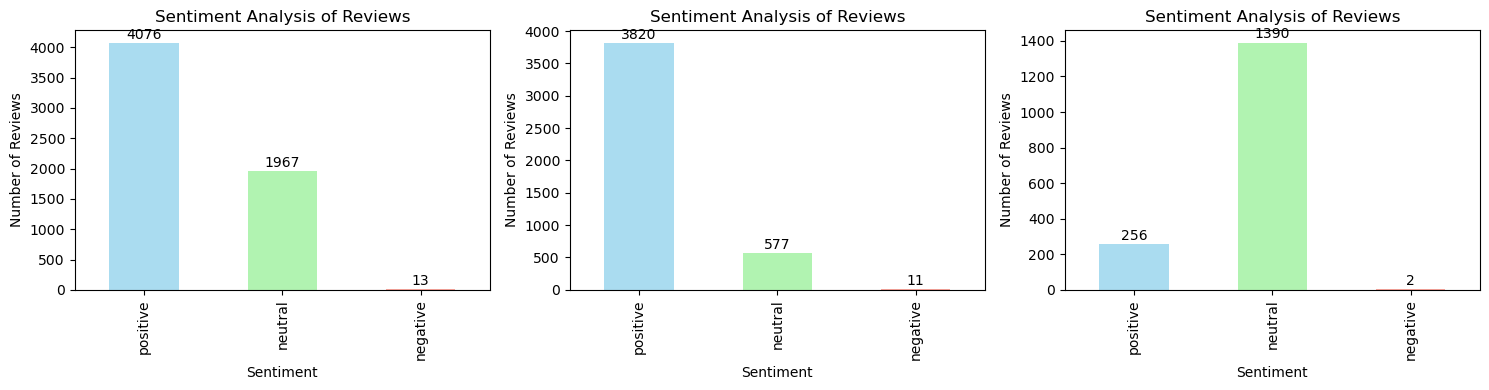

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))


sentiment_counts = df_train_merged_clean['sentiment_stem'].value_counts()
sentiment_chart(sentiment_counts, axs[0])

sentiment_counts = listed_properties_merged_sentiment['sentiment_stem'].value_counts()
sentiment_chart(sentiment_counts, axs[1])

sentiment_counts = unlisted_properties_merged_sentiment['sentiment_stem'].value_counts()
sentiment_chart(sentiment_counts, axs[2])

plt.tight_layout()
plt.show()

## 3. Embedding Techniques

In [10]:
df_train_merged_clean['text_lemmitize'] = (df_train_merged_clean['description_lemmitize'].fillna('') + 
                                              df_train_merged_clean['host_about_lemmitize'].fillna('') + 
                                              df_train_merged_clean['comments_lemmitize'].fillna(''))

df_train_merged_clean['text_stemming'] = (df_train_merged_clean['description_stemming'].fillna('') + 
                                             df_train_merged_clean['host_about_stemming'].fillna('') + 
                                             df_train_merged_clean['comments_stemming'].fillna(''))

# Ensure no empty strings
assert df_train_merged_clean['text_lemmitize'].apply(lambda x: isinstance(x, str) and len(x) > 0).all(), "There are empty strings in 'text_lemmitize'"

labels = df_train_merged_clean['unlisted']

## 4. Models For Lemmatized Text

### 4.1 Tokenization and Pad Sequences

In [11]:
tokenizer = Tokenizer(num_words=10000)  # Usar las 10,000 palabras más frecuentes
tokenizer.fit_on_texts(df_train_merged_clean['text_lemmitize'])
sequences = tokenizer.texts_to_sequences(df_train_merged_clean['text_lemmitize'])

max_sequence_length = 200  # Define max length of sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

y = np.array(labels)

### <span style="color: blue; font-weight: bold;">4.2 Split the Dataset</span>

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color: orange; font-weight: bold;">4.3 LSTM</span>

We want to use embeddings, not for predictions 

In [13]:
# 1. Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 2. Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.7889 - loss: 0.4669 - val_accuracy: 0.8688 - val_loss: 0.3581
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.8964 - loss: 0.3002 - val_accuracy: 0.8705 - val_loss: 0.3513
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9213 - loss: 0.2339 - val_accuracy: 0.8564 - val_loss: 0.3845
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9441 - loss: 0.1596 - val_accuracy: 0.8581 - val_loss: 0.4412
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.9602 - loss: 0.1143 - val_accuracy: 0.8474 - val_loss: 0.5195


<span style="color: blue; font-weight: bold;"> Test</span>

In [14]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Model accuracy: {accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8490 - loss: 0.5083
Model accuracy: 0.8473597168922424


### <span style="color: orange; font-weight: bold;">4.4 GloVe</span>

In [15]:
# Load GloVe embeddings (assuming path is adjusted)
glove = vocab.GloVe(name='6B', dim=50)
print('Loaded {} words'.format(len(glove.itos)))


word_index = tokenizer.word_index
embedding_dim = 50  # Dimensions of the GloVe vectors

embedding_matrix_GloVe = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in glove.stoi:  # Check if word is in GloVe vocabulary
        embedding_matrix_GloVe[i] = glove.vectors[glove.stoi[word]].numpy()

Loaded 400000 words


In [16]:
X_train_embeddings = get_embedding_vectors(X_train, embedding_matrix_GloVe)
X_val_embeddings = get_embedding_vectors(X_val, embedding_matrix_GloVe)

### <span style="color: orange; font-weight: bold;">4.5 TF-IDF</span>

In [17]:
X_tf_idf = df_train_merged_clean['text_lemmitize']
X_train_tf_idf, X_val_tf_idf, y_train, y_val = train_test_split(X_tf_idf, y, test_size=0.2, random_state=42)

In [18]:
tfidf = TfidfVectorizer()
X_tf_idf = tfidf.fit_transform(X_train_tf_idf)

X_val_tf_idf = tfidf.transform(X_val_tf_idf)

In [19]:
df = pd.DataFrame(X_tf_idf[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df.sort_values('TF-IDF', ascending=False).head(10)

,TF-IDF
room,0.215907
okay,0.163750
fair,0.117432
shared,0.116689
mould,0.106366
reste,0.099782
common,0.094151
metro,0.093946
stay,0.093783
bathroom,0.092945


### <span style="color: orange; font-weight: bold;">4.6 Word2Vec</span>

In [20]:
text_data = df_train_merged_clean['text_lemmitize'].apply(lambda x: x.split())

In [21]:
word2vec_model = Word2Vec(sentences=text_data, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(text_data, total_examples=word2vec_model.corpus_count, epochs=10)

(78849744, 87667600)

In [22]:
X_train_text, X_val_text, y_train, y_val = train_test_split(text_data, labels, test_size=0.2, random_state=42)

X_train_w2v = get_word2vec_vectors(X_train_text, word2vec_model, 100)
X_val_w2v = get_word2vec_vectors(X_val_text, word2vec_model, 100)

In [23]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(y_preds, y_val, titles, figsize=(10, 10)):
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i in range(4):
        cm = confusion_matrix(y_val, y_preds[i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', linewidths=0.5, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

## <span style="color: purple; font-weight: bold;">5. Classification Models For Lemmatized Text</span>

### 5.1 Models Using LSTM Embedding

In [24]:
# Extracting embeddings from the LSTM model (using the output of the last LSTM layer)
embedding_model = Sequential(model.layers[:-1])  # Remove the last layer (Dense layer)
embedding_model.add(Flatten())  # Asegurar que las salidas sean unidimensionales
embedding_model.compile(loss='binary_crossentropy', optimizer='adam')
embeddings_train = embedding_model.predict(X_train)
embeddings_val = embedding_model.predict(X_val)

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


#### 5.1.1 Logistic Regression

In [25]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(embeddings_train, y_train)
y_pred_logistic = logistic_model.predict(embeddings_val)

#### 5.1.2 Random Forest

In [26]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(embeddings_train, y_train)
y_pred_rf = random_forest_model.predict(embeddings_val)

#### 5.1.3 Decision Tree

In [27]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(embeddings_train, y_train)
y_pred_dt = decision_tree_model.predict(embeddings_val)

#### 5.1.4 LST Model

In [28]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# loss, accuracy = model.evaluate(X_val, y_val)
# print(f'Model accuracy: {accuracy}')

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 127ms/step - accuracy: 0.7934 - loss: 0.4590 - val_accuracy: 0.8705 - val_loss: 0.3476
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9014 - loss: 0.2883 - val_accuracy: 0.8589 - val_loss: 0.3580
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9152 - loss: 0.2447 - val_accuracy: 0.8548 - val_loss: 0.4149
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9387 - loss: 0.1814 - val_accuracy: 0.8474 - val_loss: 0.4252
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9580 - loss: 0.1203 - val_accuracy: 0.8424 - val_loss: 0.4790


In [29]:
y_pred_prob = model.predict(X_val)
y_pred_lstm = (y_pred_prob > 0.5).astype("int32")

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [30]:
print_evaluation_metrics(y_val, y_pred_logistic,  "Logistic Regression", "lemmitize")
print_evaluation_metrics(y_val, y_pred_rf,  "Random Forest", "lemmitize")
print_evaluation_metrics(y_val, y_pred_dt,  "Decision Tree", "lemmitize")
print_evaluation_metrics(y_val, y_pred_lstm,  "LST", "lemmitize")

Evaluation Metrics for Logistic Regression with lemmitize Descriptions:
Accuracy: 0.8498
Precision: 0.8189
Recall: 0.7966
F1-Score: 0.8064
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.92      0.90       875
        True       0.76      0.68      0.71       337

    accuracy                           0.85      1212
   macro avg       0.82      0.80      0.81      1212
weighted avg       0.85      0.85      0.85      1212



Evaluation Metrics for Random Forest with lemmitize Descriptions:
Accuracy: 0.8474
Precision: 0.8158
Recall: 0.7930
F1-Score: 0.8030
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.92      0.90       875
        True       0.75      0.67      0.71       337

    accuracy                           0.85      1212
   macro avg       0.82      0.79      0.80      1212
weighted avg       0.84      0.85      0.84      1212



Evaluation Metrics for D

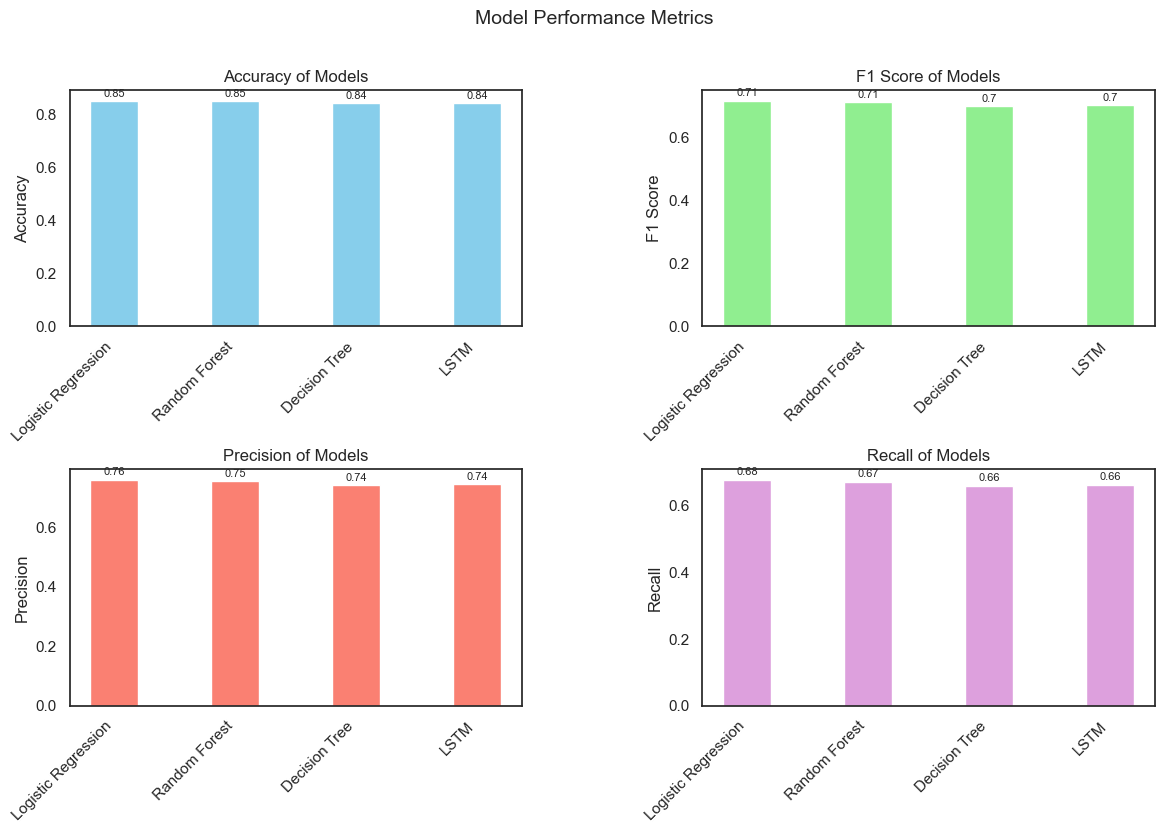

In [31]:
y_preds = [y_pred_logistic, y_pred_rf, y_pred_dt, y_pred_lstm]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

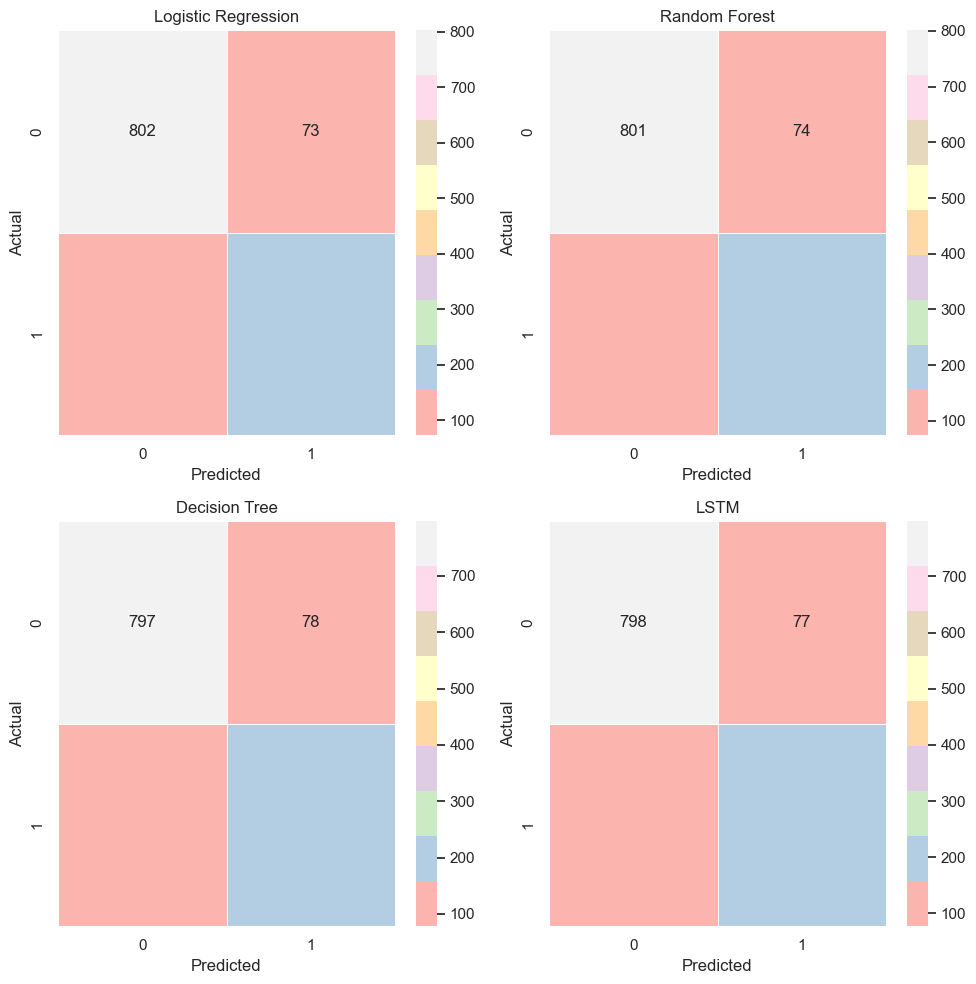

In [32]:
plot_confusion_matrices(y_preds, y_val, model_names)

### 5.2 Models Using GloVe Embedding

#### 5.2.1 Logistic Regression

In [33]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_embeddings, y_train)

y_pred_logistic_Glove = logistic_regression.predict(X_val_embeddings)

#### 5.2.2 Random Forest

In [34]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train_embeddings, y_train)
y_pred_rf_Glove = random_forest_model.predict(X_val_embeddings)

#### 5.2.3 Decision Tree

In [35]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_embeddings, y_train)
y_pred_dt_Gloe = decision_tree_model.predict(X_val_embeddings)

#### 5.2.4 LST Model

In [36]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix_GloVe],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

y_pred_prob = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_lstm_Glove = (y_pred_prob > 0.5).astype("int32")

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.7455 - loss: 0.5451 - val_accuracy: 0.8350 - val_loss: 0.3820
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.7693 - loss: 0.4750 - val_accuracy: 0.8020 - val_loss: 0.4872
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.8060 - loss: 0.4427 - val_accuracy: 0.8432 - val_loss: 0.3742
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.8113 - loss: 0.4344 - val_accuracy: 0.8375 - val_loss: 0.3751
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8192 - loss: 0.4145 - val_accuracy: 0.8234 - val_loss: 0.3828
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [37]:
print_evaluation_metrics(y_val, y_pred_logistic_Glove,  "Logistic Regression", "lemmitize")
print_evaluation_metrics(y_val, y_pred_rf_Glove,  "Random Forest", "lemmitize")
print_evaluation_metrics(y_val, y_pred_dt_Gloe,  "Decision Tree", "lemmitize")
print_evaluation_metrics(y_val, y_pred_lstm,  "LST", "lemmitize")

Evaluation Metrics for Logistic Regression with lemmitize Descriptions:
Accuracy: 0.8061
Precision: 0.7633
Recall: 0.7307
F1-Score: 0.7434
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       875
        True       0.68      0.56      0.62       337

    accuracy                           0.81      1212
   macro avg       0.76      0.73      0.74      1212
weighted avg       0.80      0.81      0.80      1212



Evaluation Metrics for Random Forest with lemmitize Descriptions:
Accuracy: 0.8507
Precision: 0.8164
Recall: 0.8063
F1-Score: 0.8110
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90       875
        True       0.74      0.71      0.72       337

    accuracy                           0.85      1212
   macro avg       0.82      0.81      0.81      1212
weighted avg       0.85      0.85      0.85      1212



Evaluation Metrics for D

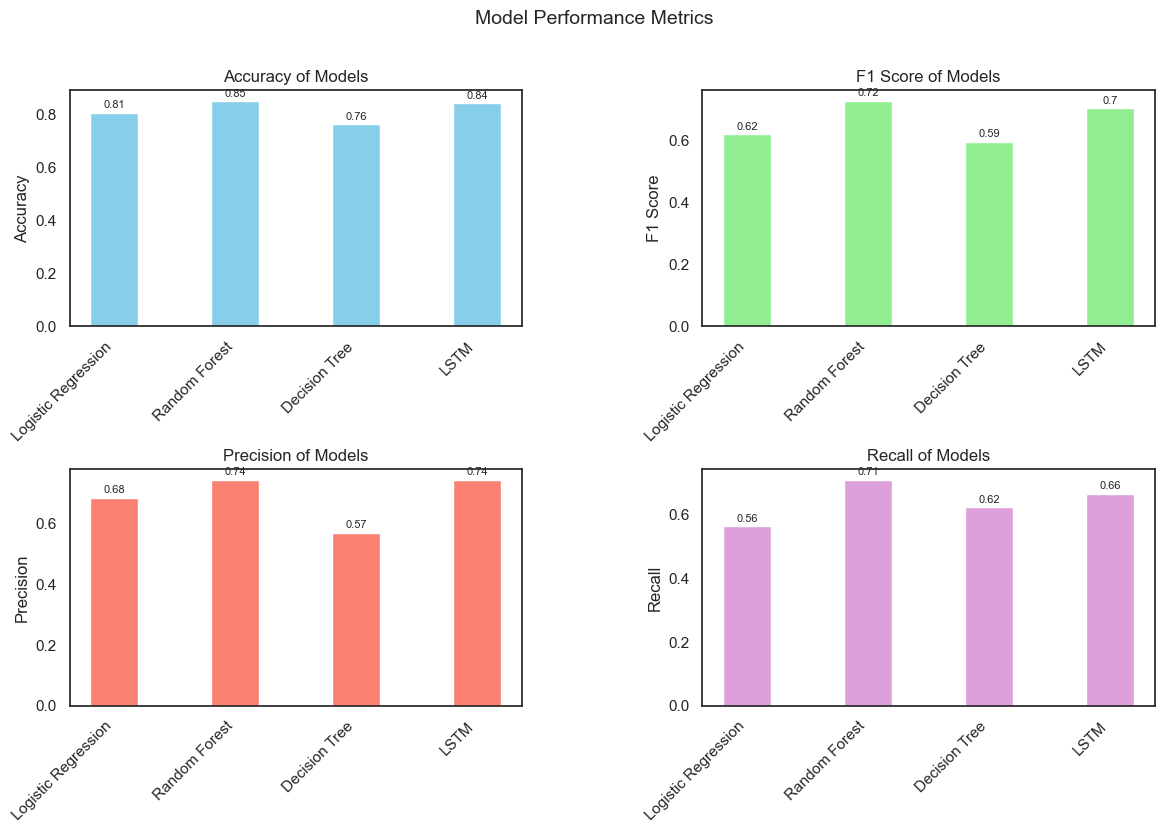

In [38]:
y_preds = [y_pred_logistic_Glove, y_pred_rf_Glove, y_pred_dt_Gloe, y_pred_lstm]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

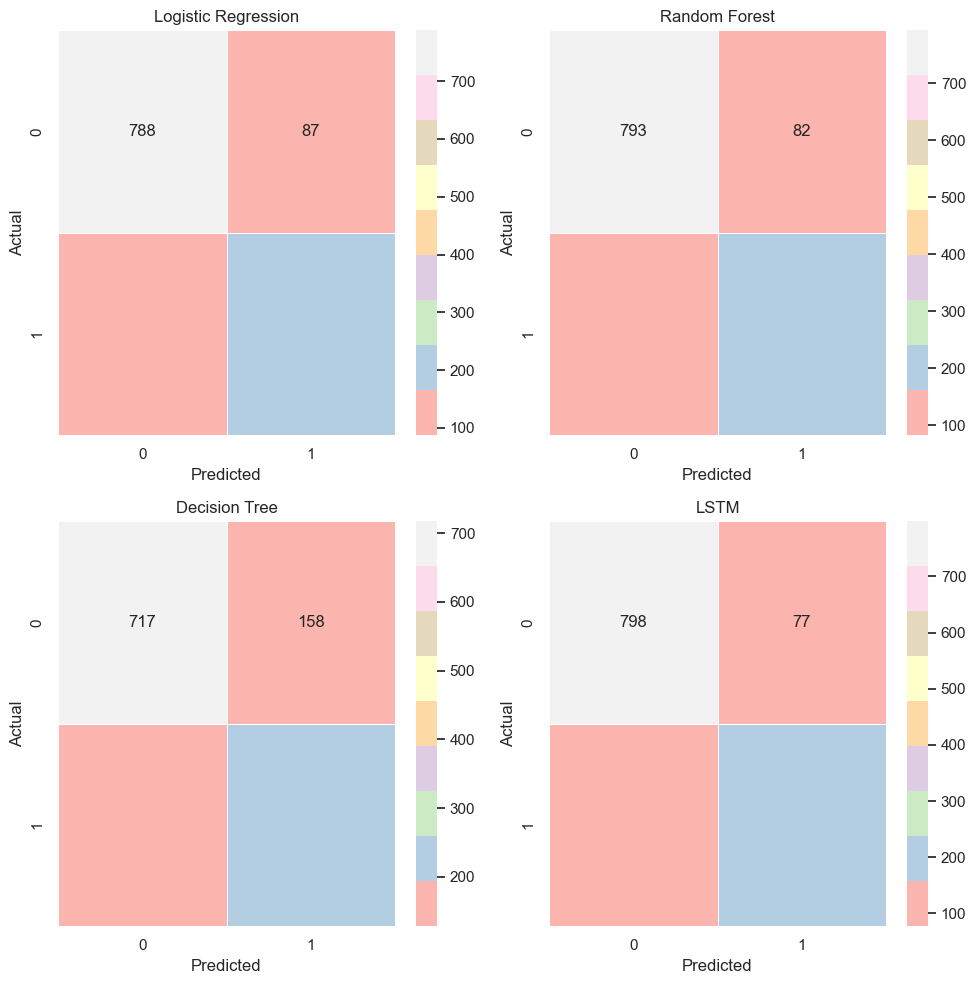

In [39]:
plot_confusion_matrices(y_preds, y_val, model_names)

### 5.3 Models Using TF-IDF Embedding

#### 5.3.1 Logistic Regression

In [40]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_tf_idf, y_train)

y_pred_logistic_tf_idf = logistic_regression.predict(X_val_tf_idf)

#### 5.3.2 Random Forest

In [41]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_tf_idf, y_train)
y_pred_rf_tf_idf = random_forest_model.predict(X_val_tf_idf)

#### 5.3.3 Decision Tree

In [42]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_tf_idf, y_train)
y_pred_dt_tf_idf = decision_tree_model.predict(X_val_tf_idf)

#### 5.3.4 LST Model

In [43]:
# model = Sequential()
# model.add(Embedding(input_dim=len(word_index) + 1,
#                     output_dim=embedding_dim,
#                     weights=[embedding_matrix_GloVe],
#                     input_length=max_sequence_length,
#                     trainable=False))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_tf_idf, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# y_pred_prob = model.predict(X_val_tf_idf)

# # Convert predicted probabilities to class labels
# y_pred_lstm_tf_idf = (y_pred_prob > 0.5).astype("int32")

In [44]:
# print_evaluation_metrics(y_val, y_pred_logistic_tf_idf,  "Logistic Regression", "lemmitize")
# print_evaluation_metrics(y_val, y_pred_rf_tf_idf,  "Random Forest", "lemmitize")
# print_evaluation_metrics(y_val, y_pred_dt_tf_idf,  "Decision Tree", "lemmitize")
# print_evaluation_metrics(y_val, y_pred_lstm_tf_idf,  "LST", "lemmitize")

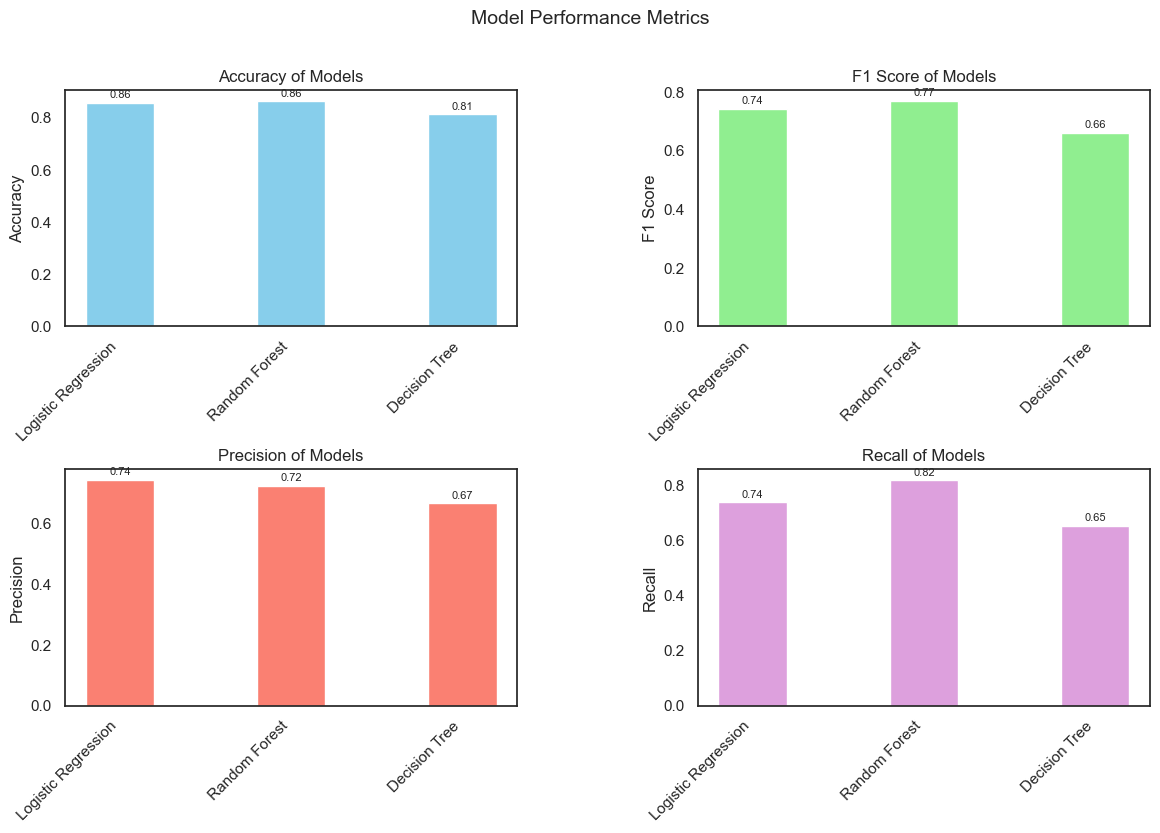

In [45]:
y_preds = [y_pred_logistic_tf_idf, y_pred_rf_tf_idf, y_pred_dt_tf_idf]#, y_pred_lstm_tf_idf]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']#, 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

In [46]:
def plot_confusion_matrices2(y_preds, y_val, titles, figsize=(10, 10)):
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i in range(3):
        cm = confusion_matrix(y_val, y_preds[i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', linewidths=0.5, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

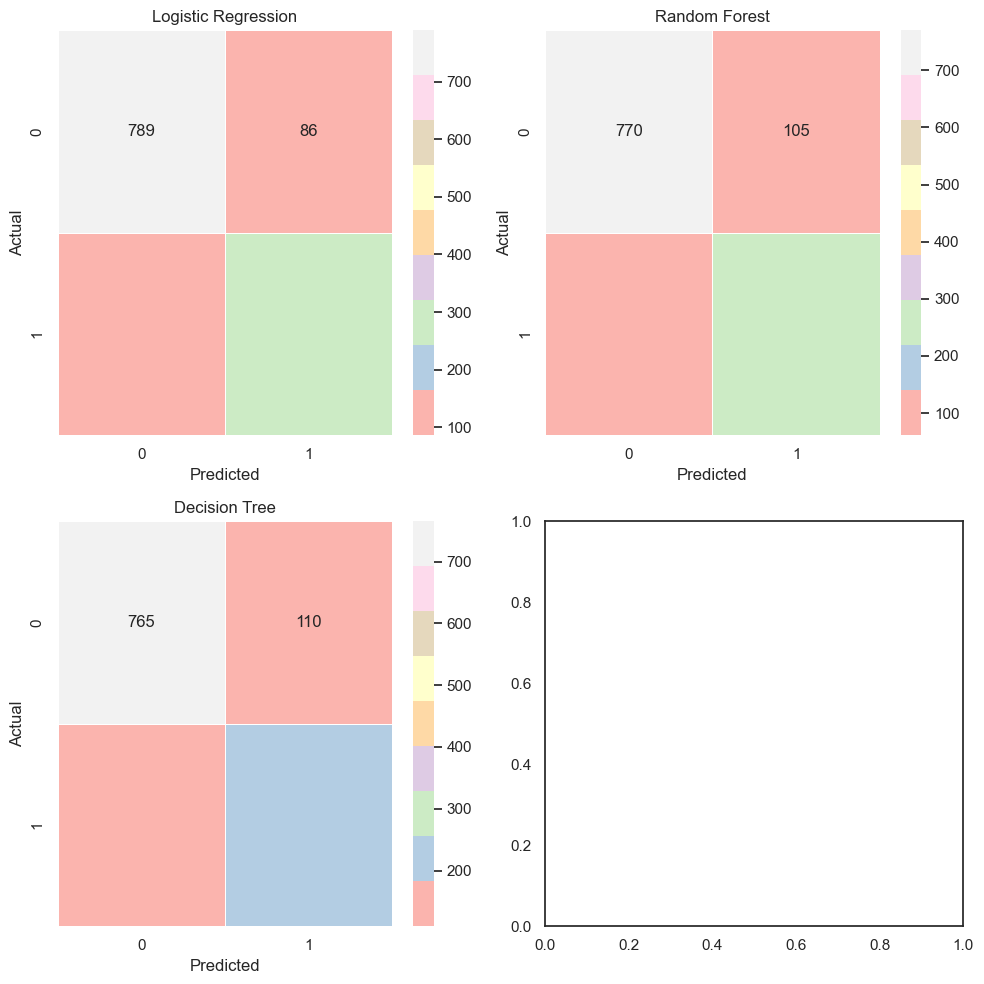

In [47]:
plot_confusion_matrices2(y_preds, y_val, model_names)

### 5.4 Models Using Word2Vec Embedding

#### 5.4.1 Logistic Regression

In [48]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_w2v, y_train)



y_pred_logistic_w2v = logistic_regression.predict(X_val_w2v)

#### 5.4.2 Random Forest

In [49]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train_w2v, y_train)
y_pred_rf_w2v = random_forest_model.predict(X_val_w2v)

#### 5.4.3 Decision Tree

In [50]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_w2v, y_train)
y_pred_dt_w2v= decision_tree_model.predict(X_val_w2v)

#### 5.4.4 LST Model

In [51]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix_GloVe],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_w2v, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

y_pred_prob = model.predict(X_val_w2v)

# Convert predicted probabilities to class labels
y_pred_lstm_w2v = (y_pred_prob > 0.5).astype("int32")

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7455 - loss: 0.5771 - val_accuracy: 0.5239 - val_loss: 0.7720
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7323 - loss: 0.5431 - val_accuracy: 0.6015 - val_loss: 0.6738
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7702 - loss: 0.5331 - val_accuracy: 0.4843 - val_loss: 0.7887
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7621 - loss: 0.5291 - val_accuracy: 0.4711 - val_loss: 0.7889
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7352 - loss: 0.5541 - val_accuracy: 0.4579 - val_loss: 0.8255
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [52]:
print_evaluation_metrics(y_val, y_pred_logistic_w2v,  "Logistic Regression", "lemmitize")
print_evaluation_metrics(y_val, y_pred_rf_w2v,  "Random Forest", "lemmitize")
print_evaluation_metrics(y_val, y_pred_dt_w2v,  "Decision Tree", "lemmitize")
print_evaluation_metrics(y_val, y_pred_lstm_w2v,  "LST", "lemmitize")

Evaluation Metrics for Logistic Regression with lemmitize Descriptions:
Accuracy: 0.8366
Precision: 0.7962
Recall: 0.7984
F1-Score: 0.7973
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.88      0.89       875
        True       0.70      0.71      0.71       337

    accuracy                           0.84      1212
   macro avg       0.80      0.80      0.80      1212
weighted avg       0.84      0.84      0.84      1212



Evaluation Metrics for Random Forest with lemmitize Descriptions:
Accuracy: 0.8515
Precision: 0.8133
Recall: 0.8233
F1-Score: 0.8180
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       875
        True       0.72      0.76      0.74       337

    accuracy                           0.85      1212
   macro avg       0.81      0.82      0.82      1212
weighted avg       0.85      0.85      0.85      1212



Evaluation Metrics for D

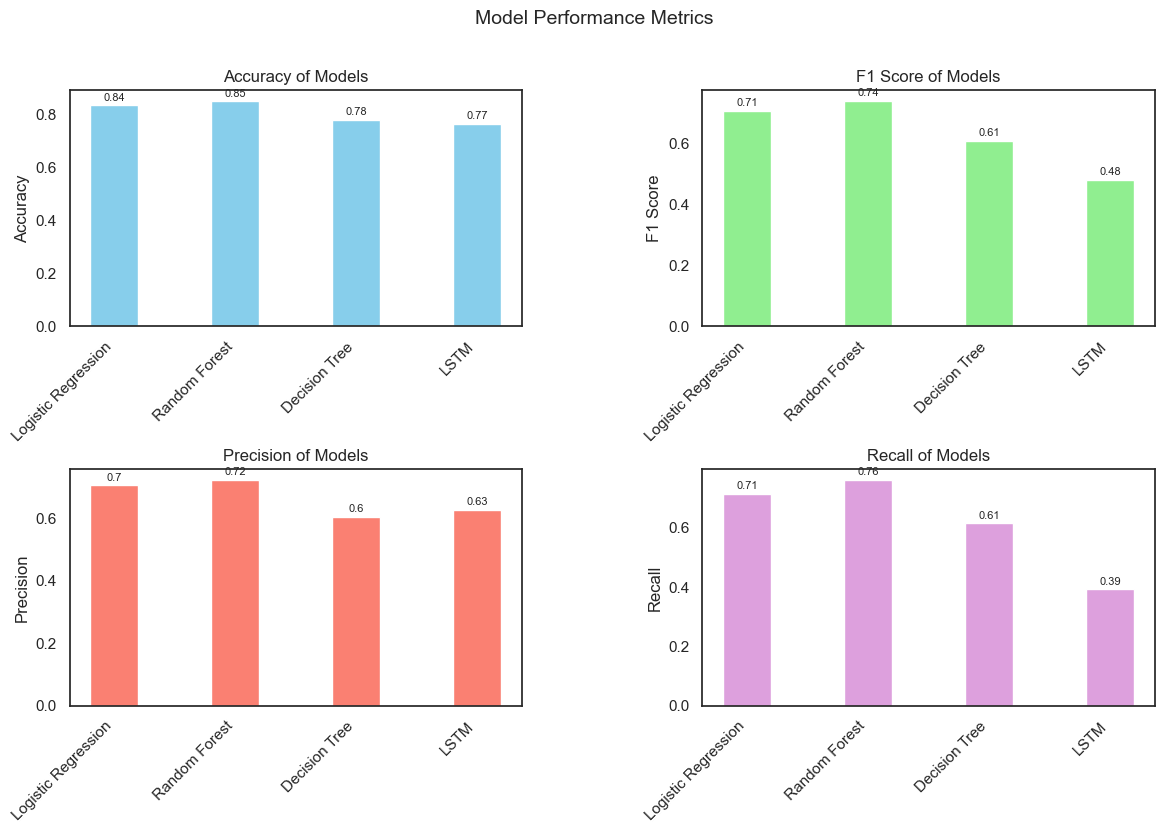

In [53]:
y_preds = [y_pred_logistic_w2v, y_pred_rf_w2v, y_pred_dt_w2v, y_pred_lstm_w2v]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

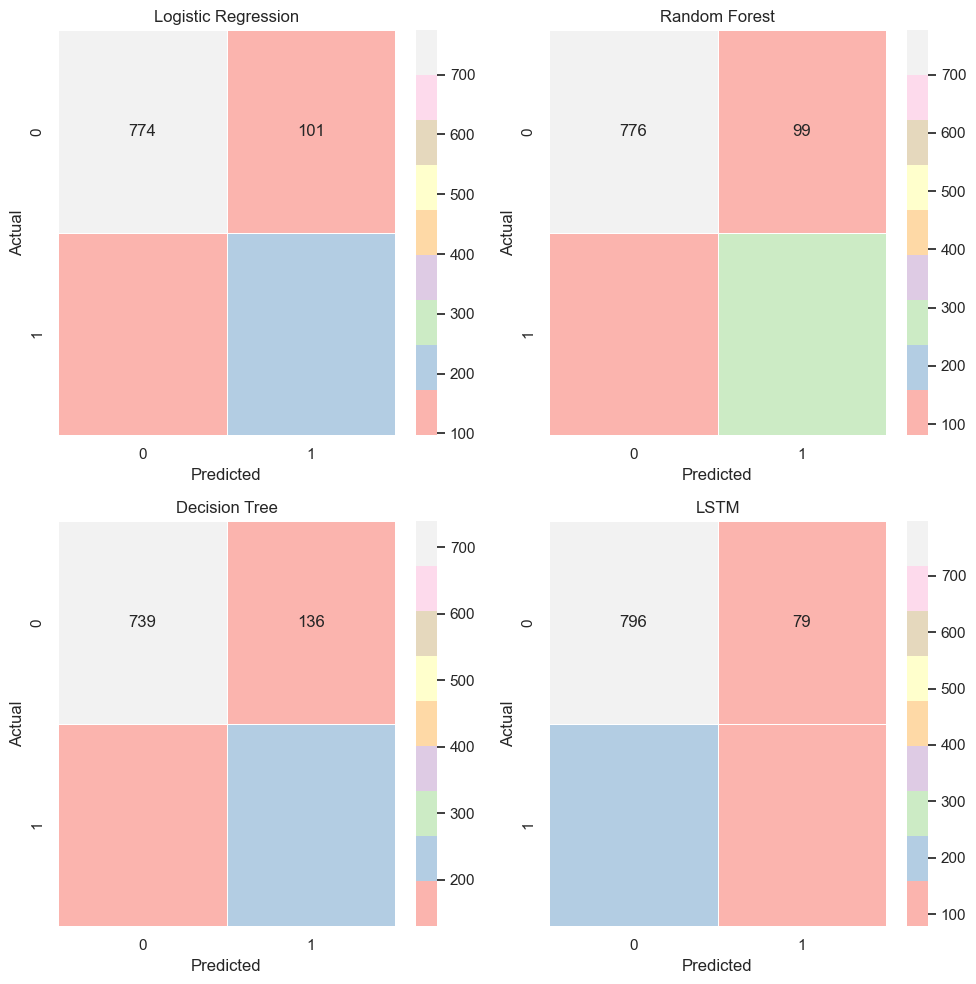

In [54]:
plot_confusion_matrices(y_preds, y_val, model_names)

## 6. Models For Stemmed Text

### 6.1 Tokenization and Pad Sequences

In [55]:
tokenizer = Tokenizer(num_words=10000)  # Usar las 10,000 palabras más frecuentes
tokenizer.fit_on_texts(df_train_merged_clean['text_stemming'])
sequences = tokenizer.texts_to_sequences(df_train_merged_clean['text_stemming'])

max_sequence_length = 200  # Define max length of sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

y = np.array(labels)

### 6.2 Split the Dataset

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color: orange; font-weight: bold;">6.3 LSTM</span>

We want to use embeddings, not for predictions 

In [57]:
# 1. Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 2. Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.7788 - loss: 0.4797 - val_accuracy: 0.8639 - val_loss: 0.3566
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.8965 - loss: 0.3065 - val_accuracy: 0.8680 - val_loss: 0.3619
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.9315 - loss: 0.2190 - val_accuracy: 0.8548 - val_loss: 0.3848
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9364 - loss: 0.1846 - val_accuracy: 0.8597 - val_loss: 0.3902
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9593 - loss: 0.1338 - val_accuracy: 0.8498 - val_loss: 0.4634


In [58]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Model accuracy: {accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8536 - loss: 0.4442
Model accuracy: 0.8498349785804749


### <span style="color: orange; font-weight: bold;">6.4 GloVe</span>

In [59]:
# Load GloVe embeddings (assuming path is adjusted)
#TRY WITH THIS AND WITHOUT THIS
glove = vocab.GloVe(name='6B', dim=50)
print('Loaded {} words'.format(len(glove.itos)))


word_index = tokenizer.word_index
embedding_dim = 50  # Dimensions of the GloVe vectors

embedding_matrix_GloVe = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in glove.stoi:  # Check if word is in GloVe vocabulary
        embedding_matrix_GloVe[i] = glove.vectors[glove.stoi[word]].numpy()

Loaded 400000 words


In [60]:
X_train_embeddings = get_embedding_vectors(X_train, embedding_matrix_GloVe)
X_val_embeddings = get_embedding_vectors(X_val, embedding_matrix_GloVe)

### <span style="color: orange; font-weight: bold;">6.5 TF-IDF</span>

In [61]:
X_tf_idf = df_train_merged_clean['text_stemming']
X_train_tf_idf, X_val_tf_idf, y_train, y_val = train_test_split(X_tf_idf, y, test_size=0.2, random_state=42)

In [62]:
tfidf = TfidfVectorizer()
X_tf_idf = tfidf.fit_transform(X_train_tf_idf)

X_val_tf_idf = tfidf.transform(X_val_tf_idf)

In [63]:
df = pd.DataFrame(X_tf_idf[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df.sort_values('TF-IDF', ascending=False).head(10)

,TF-IDF
room,0.223133
okay,0.169120
stay,0.122823
locat,0.120657
mould,0.108843
nice,0.108739
apart,0.105968
common,0.097092
bathroom,0.096036
thumbsdownlightskinton,0.095541


### <span style="color: orange; font-weight: bold;">6.6 Word2Vec</span>

In [64]:
text_data = df_train_merged_clean['text_stemming'].apply(lambda x: x.split())

In [65]:
word2vec_model = Word2Vec(sentences=text_data, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(text_data, total_examples=word2vec_model.corpus_count, epochs=10)

(77312750, 87667600)

In [66]:
X_train_text, X_val_text, y_train, y_val = train_test_split(text_data, labels, test_size=0.2, random_state=42)

X_train_w2v = get_word2vec_vectors(X_train_text, word2vec_model, 100)
X_val_w2v = get_word2vec_vectors(X_val_text, word2vec_model, 100)

## <span style="color: purple; font-weight: bold;">7. Classification Models For Stemmed Text</span>

### 7.1 Models Using LSTM Embedding

In [67]:
# Extracting embeddings from the LSTM model (using the output of the last LSTM layer)
embedding_model = Sequential(model.layers[:-1])  # Remove the last layer (Dense layer)
embedding_model.add(Flatten())  # Asegurar que las salidas sean unidimensionales
embedding_model.compile(loss='binary_crossentropy', optimizer='adam')
embeddings_train = embedding_model.predict(X_train)
embeddings_val = embedding_model.predict(X_val)

152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


#### 7.1.1 Logistic Regression

In [68]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(embeddings_train, y_train)
y_pred_logistic = logistic_model.predict(embeddings_val)

#### 7.1.2 Random Forest

In [69]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(embeddings_train, y_train)
y_pred_rf = random_forest_model.predict(embeddings_val)

#### 7.1.3 Decision Tree

In [70]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(embeddings_train, y_train)
y_pred_dt = decision_tree_model.predict(embeddings_val)

#### 7.1.4 LST Model

Not only embedding

In [71]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# loss, accuracy = model.evaluate(X_val, y_val)
# print(f'Model accuracy: {accuracy}')

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.8078 - loss: 0.4618 - val_accuracy: 0.8564 - val_loss: 0.3566
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 28s 184ms/step - accuracy: 0.8956 - loss: 0.3076 - val_accuracy: 0.8696 - val_loss: 0.3510
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - accuracy: 0.9109 - loss: 0.2541 - val_accuracy: 0.8721 - val_loss: 0.3642
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.9410 - loss: 0.1832 - val_accuracy: 0.8523 - val_loss: 0.4168
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9478 - loss: 0.1484 - val_accuracy: 0.8490 - val_loss: 0.5055


In [72]:
y_pred_prob = model.predict(X_val)
y_pred_lstm = (y_pred_prob > 0.5).astype("int32")

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


In [73]:
print_evaluation_metrics(y_val, y_pred_logistic,  "Logistic Regression", "stemming")
print_evaluation_metrics(y_val, y_pred_rf,  "Random Forest", "stemming")
print_evaluation_metrics(y_val, y_pred_dt,  "Decision Tree", "stemming")
print_evaluation_metrics(y_val, y_pred_lstm,  "LST", "stemming")

Evaluation Metrics for Logistic Regression with stemming Descriptions:
Accuracy: 0.8490
Precision: 0.8153
Recall: 0.8015
F1-Score: 0.8078
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90       875
        True       0.75      0.69      0.72       337

    accuracy                           0.85      1212
   macro avg       0.82      0.80      0.81      1212
weighted avg       0.85      0.85      0.85      1212



Evaluation Metrics for Random Forest with stemming Descriptions:
Accuracy: 0.8408
Precision: 0.8048
Recall: 0.7903
F1-Score: 0.7969
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.90      0.89       875
        True       0.73      0.68      0.70       337

    accuracy                           0.84      1212
   macro avg       0.80      0.79      0.80      1212
weighted avg       0.84      0.84      0.84      1212



Evaluation Metrics for Dec

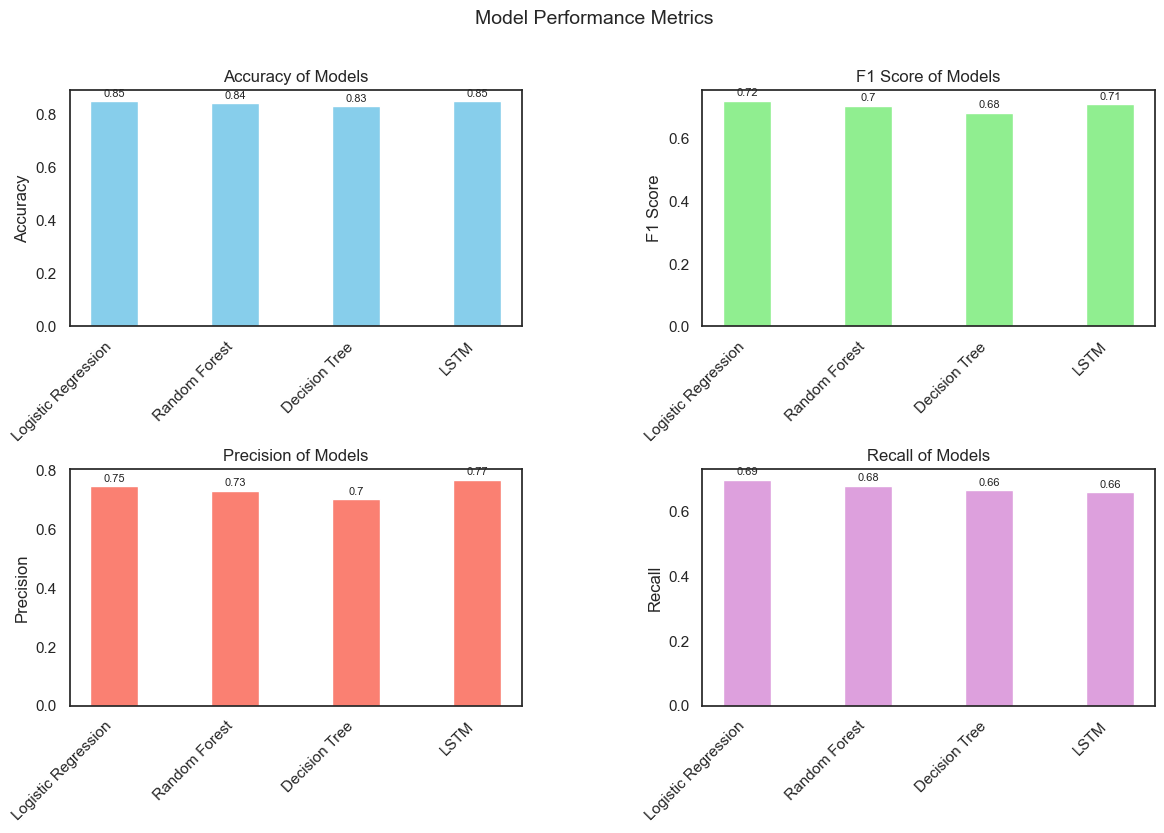

In [74]:
y_preds = [y_pred_logistic, y_pred_rf, y_pred_dt, y_pred_lstm]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

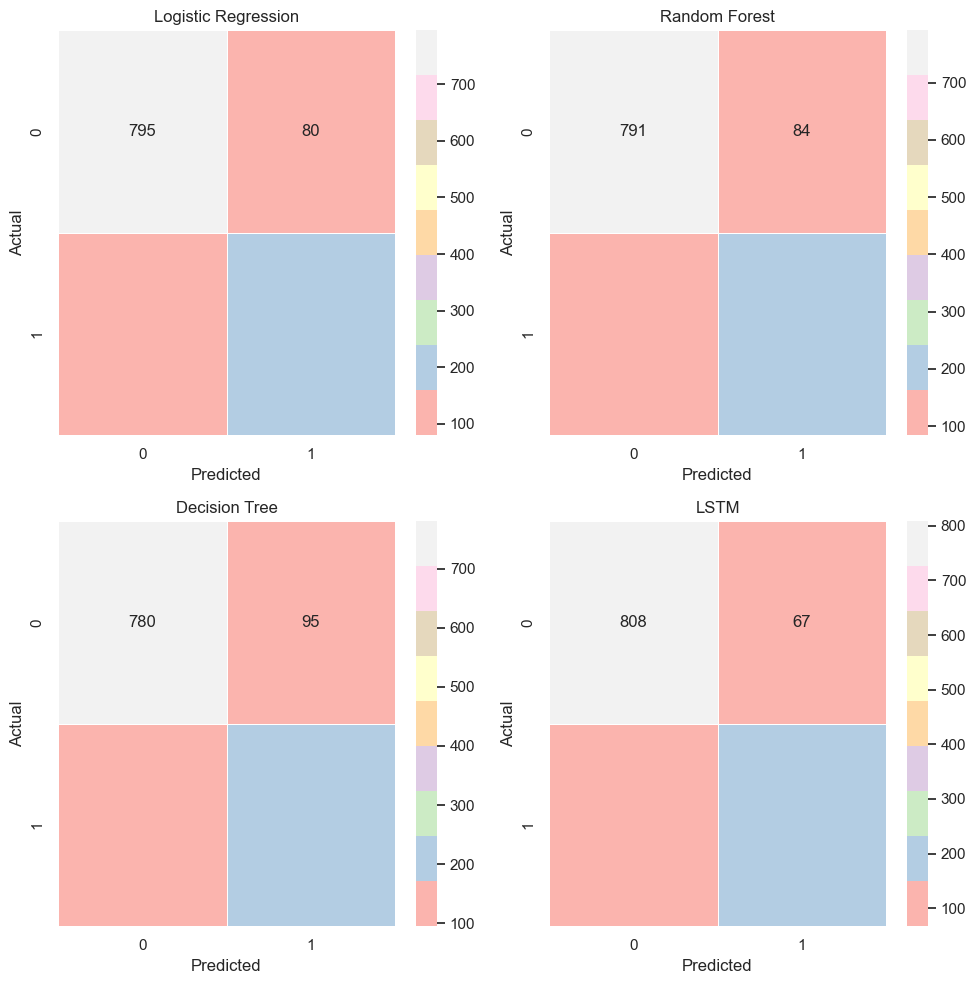

In [75]:
plot_confusion_matrices(y_preds, y_val, model_names)

### 7.2 Models Using GloVe Embedding

#### 7.2.1 Logistic Regression

In [76]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_embeddings, y_train)

y_pred_logistic_Glove = logistic_regression.predict(X_val_embeddings)

#### 7.2.2 Random Forest

In [77]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train_embeddings, y_train)
y_pred_rf_Glove = random_forest_model.predict(X_val_embeddings)

#### 7.2.3 Decision Tree

In [78]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_embeddings, y_train)
y_pred_dt_Gloe = decision_tree_model.predict(X_val_embeddings)

#### 7.2.4 LST Model

In [79]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix_GloVe],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

y_pred_prob = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_lstm_Glove = (y_pred_prob > 0.5).astype("int32")

c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.7322 - loss: 0.5492 - val_accuracy: 0.8028 - val_loss: 0.4558
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.7871 - loss: 0.4616 - val_accuracy: 0.7566 - val_loss: 0.4630
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.7778 - loss: 0.4560 - val_accuracy: 0.7285 - val_loss: 0.5488
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 335ms/step - accuracy: 0.7599 - loss: 0.5156 - val_accuracy: 0.8061 - val_loss: 0.4499
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 47s 310ms/step - accuracy: 0.7923 - loss: 0.4791 - val_accuracy: 0.7847 - val_loss: 0.4791
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step


In [80]:
print_evaluation_metrics(y_val, y_pred_logistic_Glove,  "Logistic Regression", "stemming")
print_evaluation_metrics(y_val, y_pred_rf_Glove,  "Random Forest", "stemming")
print_evaluation_metrics(y_val, y_pred_dt_Gloe,  "Decision Tree", "stemming")
print_evaluation_metrics(y_val, y_pred_lstm,  "LST", "stemming")

Evaluation Metrics for Logistic Regression with stemming Descriptions:
Accuracy: 0.7946
Precision: 0.7500
Recall: 0.7063
F1-Score: 0.7214
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.86       875
        True       0.67      0.51      0.58       337

    accuracy                           0.79      1212
   macro avg       0.75      0.71      0.72      1212
weighted avg       0.78      0.79      0.78      1212



Evaluation Metrics for Random Forest with stemming Descriptions:
Accuracy: 0.8490
Precision: 0.8116
Recall: 0.8133
F1-Score: 0.8125
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.89      0.90       875
        True       0.73      0.73      0.73       337

    accuracy                           0.85      1212
   macro avg       0.81      0.81      0.81      1212
weighted avg       0.85      0.85      0.85      1212



Evaluation Metrics for Dec

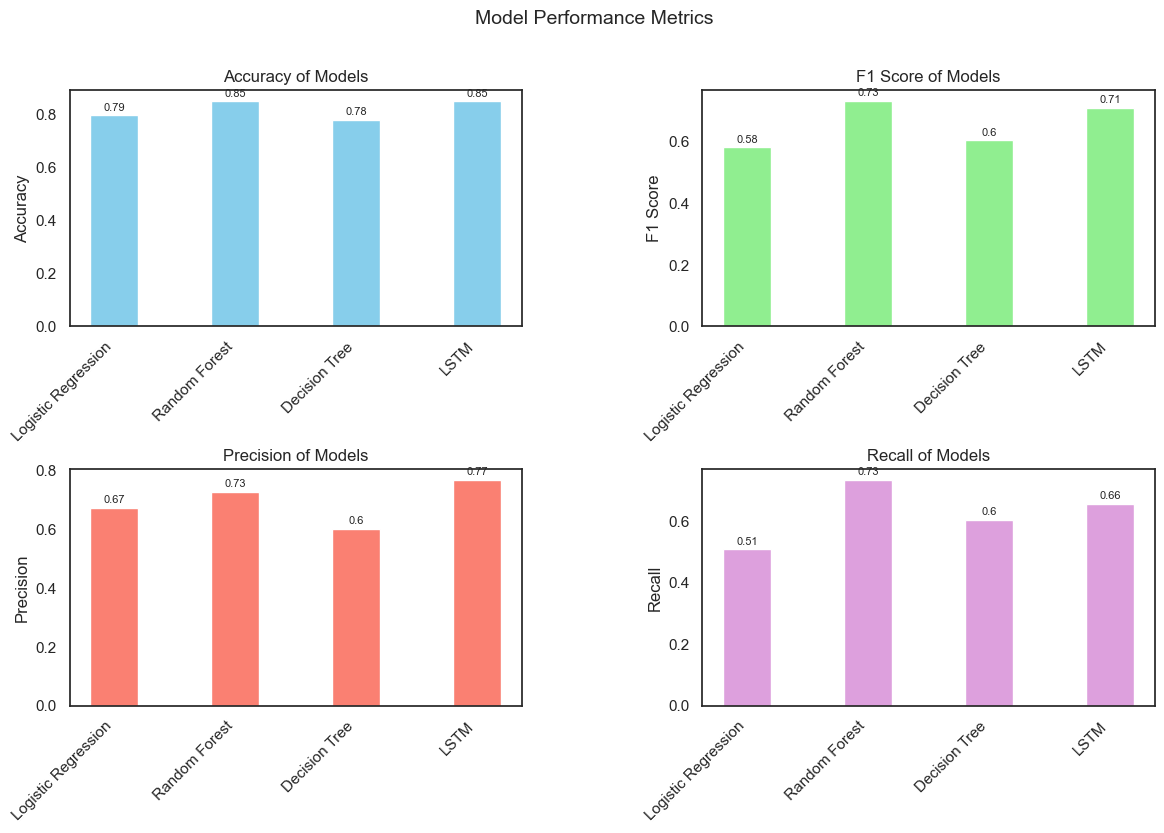

In [81]:
y_preds = [y_pred_logistic_Glove, y_pred_rf_Glove, y_pred_dt_Gloe, y_pred_lstm]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

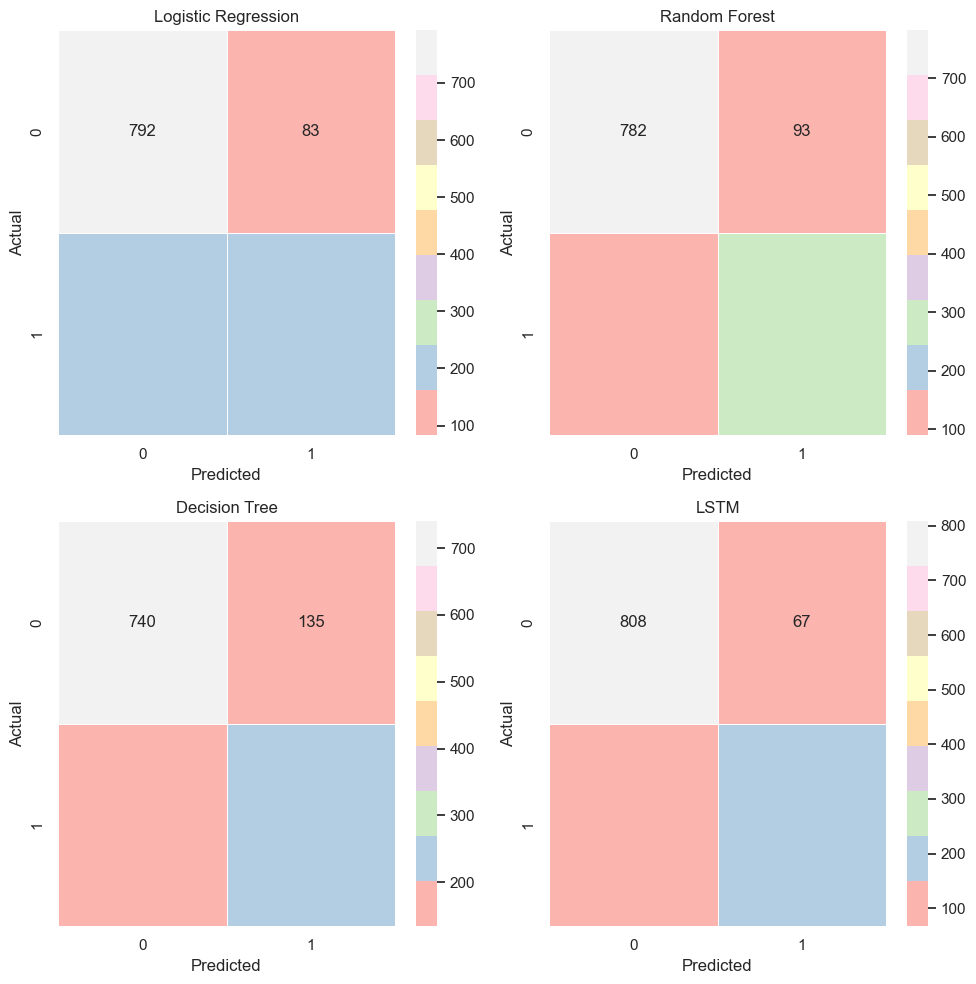

In [82]:
plot_confusion_matrices(y_preds, y_val, model_names)

### 7.3 Models Using TF-IDF Embedding

#### 7.3.1 Logistic Regression

In [83]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_tf_idf, y_train)

y_pred_logistic_tf_idf = logistic_regression.predict(X_val_tf_idf)

#### 7.3.2 Random Forest

In [84]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_tf_idf, y_train)
y_pred_rf_tf_idf = random_forest_model.predict(X_val_tf_idf)

#### 7.3.3 Decision Tree

In [85]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_tf_idf, y_train)
y_pred_dt_tf_idf = decision_tree_model.predict(X_val_tf_idf)

#### 7.3.4 LST Model

In [86]:
# model = Sequential()
# model.add(Embedding(input_dim=len(word_index) + 1,
#                     output_dim=embedding_dim,
#                     weights=[embedding_matrix_GloVe],
#                     input_length=max_sequence_length,
#                     trainable=False))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_tf_idf, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# y_pred_prob = model.predict(X_val_tf_idf)

# # Convert predicted probabilities to class labels
# y_pred_lstm_tf_idf = (y_pred_prob > 0.5).astype("int32")

In [88]:
print_evaluation_metrics(y_val, y_pred_logistic_tf_idf,  "Logistic Regression", "stemming")
print_evaluation_metrics(y_val, y_pred_rf_tf_idf,  "Random Forest", "stemming")
print_evaluation_metrics(y_val, y_pred_dt_tf_idf,  "Decision Tree", "stemming")
#print_evaluation_metrics(y_val, y_pred_lstm_tf_idf,  "LST", "stemming")

Evaluation Metrics for Logistic Regression with stemming Descriptions:
Accuracy: 0.8639
Precision: 0.8303
Recall: 0.8309
F1-Score: 0.8306
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       875
        True       0.75      0.76      0.76       337

    accuracy                           0.86      1212
   macro avg       0.83      0.83      0.83      1212
weighted avg       0.86      0.86      0.86      1212



Evaluation Metrics for Random Forest with stemming Descriptions:
Accuracy: 0.8639
Precision: 0.8264
Recall: 0.8510
F1-Score: 0.8369
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.88      0.90       875
        True       0.73      0.82      0.77       337

    accuracy                           0.86      1212
   macro avg       0.83      0.85      0.84      1212
weighted avg       0.87      0.86      0.87      1212



Evaluation Metrics for Dec

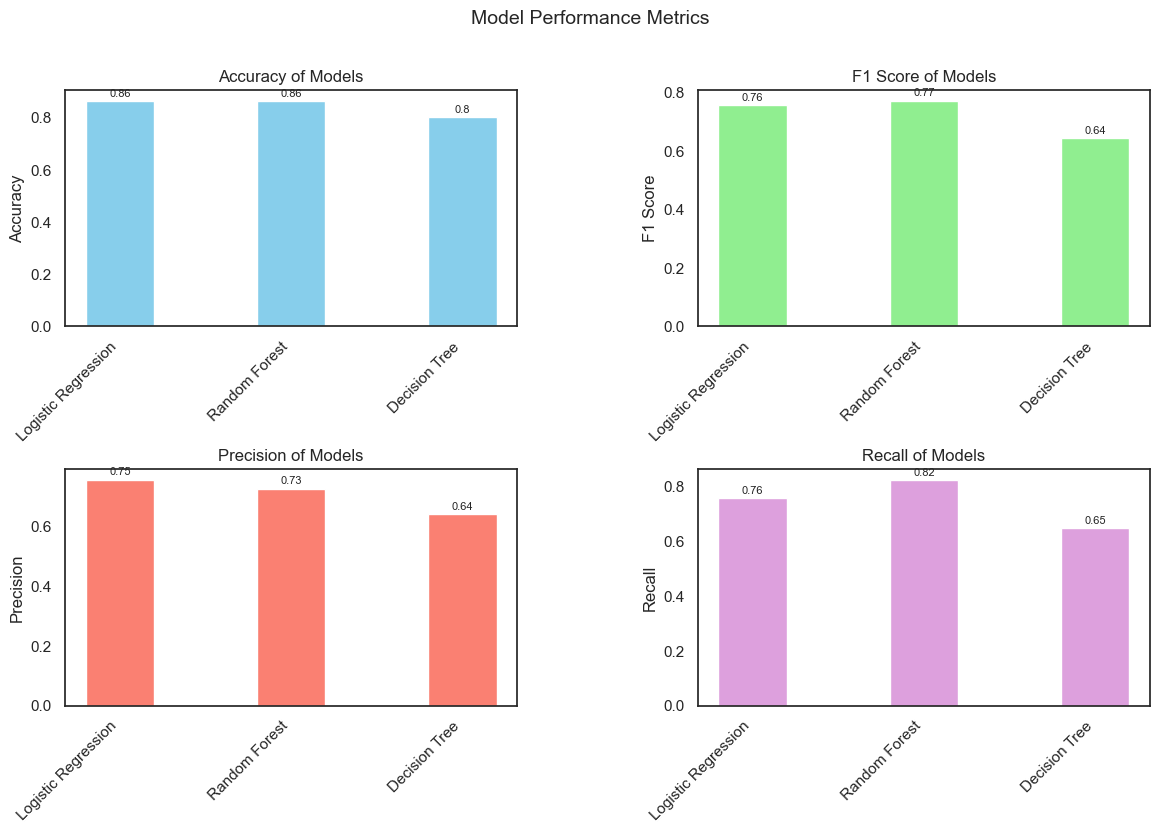

In [89]:
y_preds = [y_pred_logistic_tf_idf, y_pred_rf_tf_idf, y_pred_dt_tf_idf ]#, y_pred_lstm_tf_idf]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']#, 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

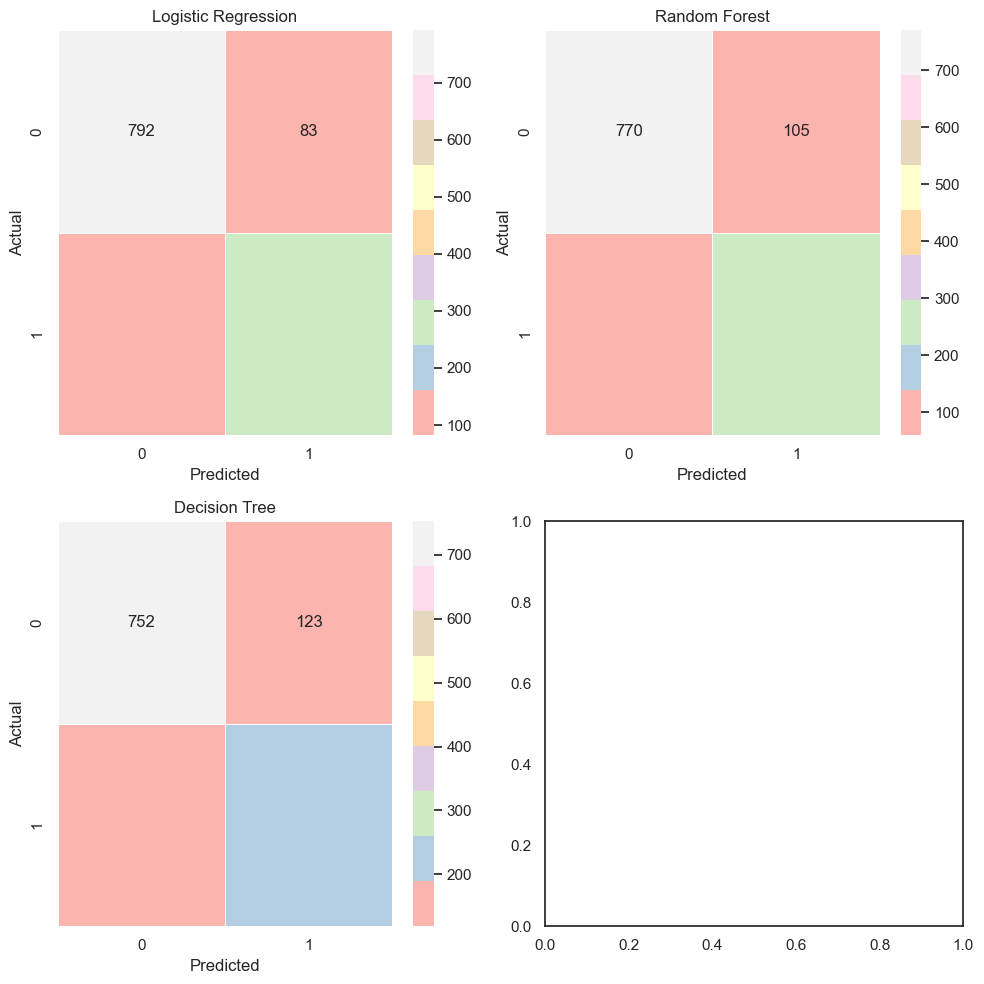

In [90]:
plot_confusion_matrices2(y_preds, y_val, model_names)

### 7.4 Models Using Word2Vec Embedding

#### 7.4.1 Logistic Regression

In [91]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_w2v, y_train)

y_pred_logistic_w2v = logistic_regression.predict(X_val_w2v)

#### 7.4.2 Random Forest

In [92]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train_w2v, y_train)
y_pred_rf_w2v = random_forest_model.predict(X_val_w2v)

#### 7.4.3 Decision Tree

In [93]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_w2v, y_train)
y_pred_dt_w2v= decision_tree_model.predict(X_val_w2v)

#### 7.4.4 LST Model

In [94]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix_GloVe],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_w2v, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

y_pred_prob = model.predict(X_val_w2v)

# Convert predicted probabilities to class labels
y_pred_lstm_w2v = (y_pred_prob > 0.5).astype("int32")

c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 31s 128ms/step - accuracy: 0.7225 - loss: 0.5993 - val_accuracy: 0.4348 - val_loss: 1.1916
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.7534 - loss: 0.5269 - val_accuracy: 0.4315 - val_loss: 1.1799
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.7461 - loss: 0.5389 - val_accuracy: 0.4299 - val_loss: 1.1383
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.7435 - loss: 0.5407 - val_accuracy: 0.4332 - val_loss: 1.1145
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.7558 - loss: 0.5249 - val_accuracy: 0.4274 - val_loss: 1.2295
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [95]:
print_evaluation_metrics(y_val, y_pred_logistic_w2v,  "Logistic Regression", "stemming")
print_evaluation_metrics(y_val, y_pred_rf_w2v,  "Random Forest", "stemming")
print_evaluation_metrics(y_val, y_pred_dt_w2v,  "Decision Tree", "stemming")
print_evaluation_metrics(y_val, y_pred_lstm_w2v,  "LST", "stemming")

Evaluation Metrics for Logistic Regression with stemming Descriptions:
Accuracy: 0.8342
Precision: 0.7934
Recall: 0.7939
F1-Score: 0.7936
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.88      0.89       875
        True       0.70      0.70      0.70       337

    accuracy                           0.83      1212
   macro avg       0.79      0.79      0.79      1212
weighted avg       0.83      0.83      0.83      1212



Evaluation Metrics for Random Forest with stemming Descriptions:
Accuracy: 0.8548
Precision: 0.8184
Recall: 0.8219
F1-Score: 0.8201
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90       875
        True       0.73      0.75      0.74       337

    accuracy                           0.85      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.86      0.85      0.86      1212



Evaluation Metrics for Dec

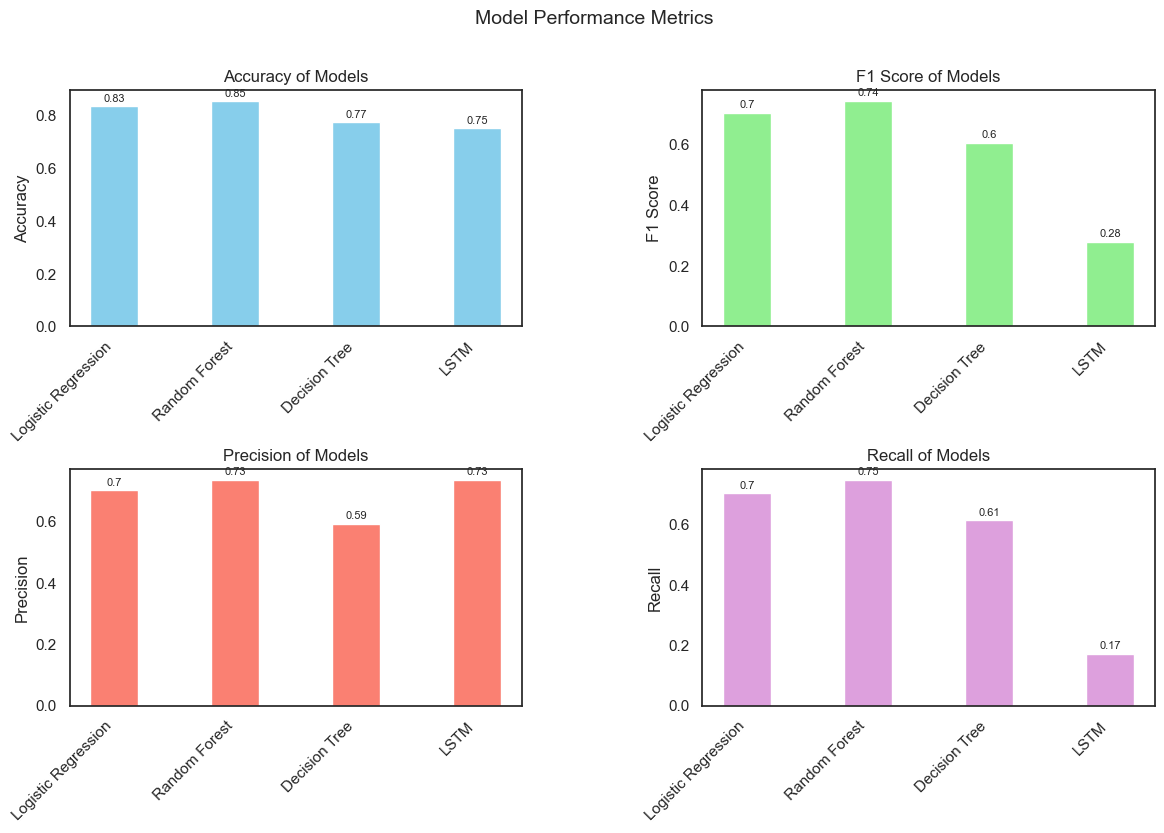

In [96]:
y_preds = [y_pred_logistic_w2v, y_pred_rf_w2v, y_pred_dt_w2v, y_pred_lstm_w2v]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LSTM']
plot_model_metrics(y_val, y_preds, model_names)

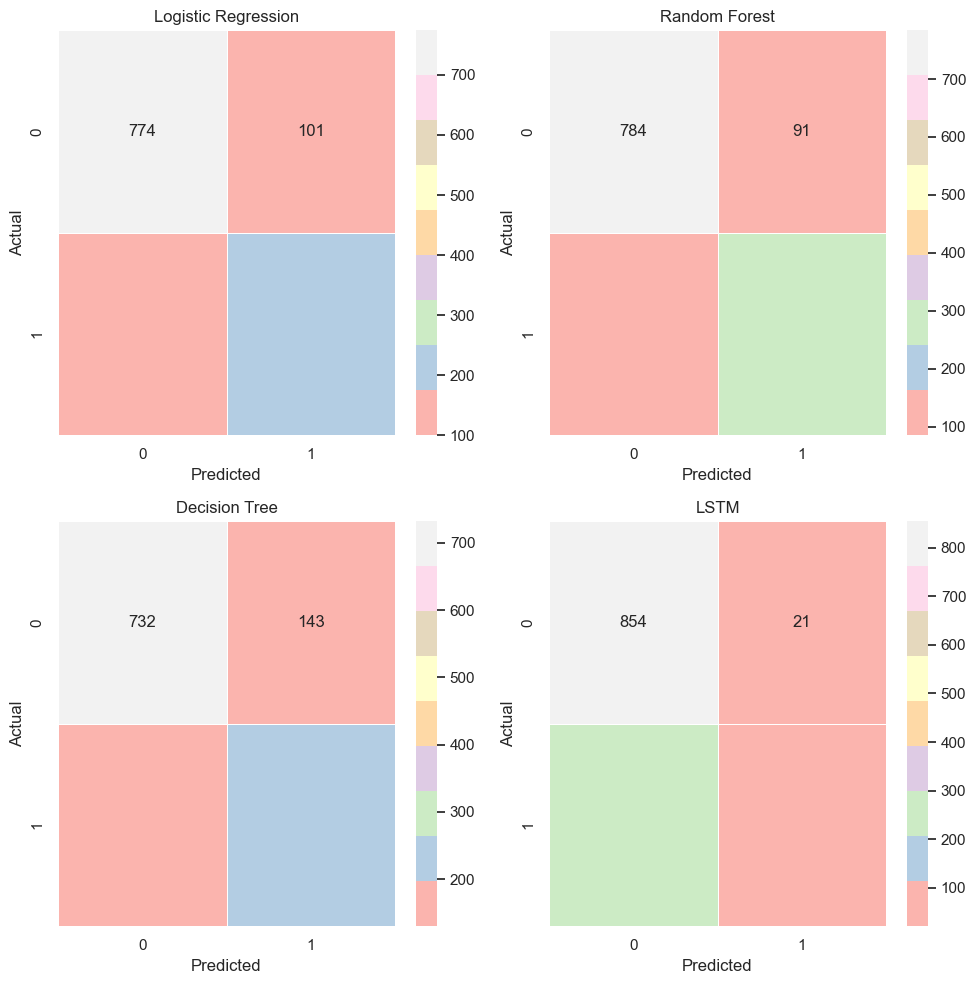

In [97]:
plot_confusion_matrices(y_preds, y_val, model_names)

## <span style="color: yellow; font-weight: bold;"> Predict test dataset </span>

### Final model

In [98]:
df_test_clean = pd.read_csv(os.path.join(data_path, 'test_cleaned_with_stem_lem.csv'),index_col = 0)
df_test_reviews_clean = pd.read_csv(os.path.join(data_path, 'test_reviews_cleaned_stem_lem.csv'), index_col = 0)

df_test_merged_clean = merge_datasets(df_test_clean, df_test_reviews_clean)

In [99]:
df_test_merged_clean.head()

,description_stemming,description_lemmitize,host_about_stemming,host_about_lemmitize,comments_stemming,comments_lemmitize
index,,,,,,
1,the spaceapart locat histor center lisbonthi a...,the spaceapartment located historic center lis...,gost viaj conhec pesso gost receb amig cas ado...,gosto viajar conhecer pessoas gosto receber am...,antonio perfect stay appart perfect locat fabu...,antonio perfect stay appartment perfectly loca...
2,import respons covid properti extend clean dis...,important response covid property extended cle...,behom team count singl detail guarante great s...,behome team count single detail guarantee grea...,beauti bright apart residenti area area bus st...,beautiful bright apartment residential area ar...
3,bright beauti spacious fourbedroom apart lour ...,bright beautiful spacious fourbedroom apartmen...,there guestreadi profession properti manag com...,there guestready professional property managem...,,
4,charm apart close bay cascai bedroom doubl bed...,charming apartment close bay cascais bedroom d...,,,claudia great host train station bring apart a...,claudia great host train station bring apartme...
5,procur umas fri pert pra casin outr atrac turs...,procura uma frias perto praia casino outras at...,bem vind portugal ador pas ador conhec outr cu...,bem vindos portugal adoro pa adoro conhecer ou...,maison exact comm photos cest tr propr drap se...,maison exactement comme photo cest trs propre ...


In [100]:
df_test_merged_clean['text_lemmitize'] = (df_test_merged_clean['description_lemmitize'].fillna('') + 
                                              df_test_merged_clean['host_about_lemmitize'].fillna('') + 
                                              df_test_merged_clean['comments_lemmitize'].fillna(''))

df_test_merged_clean['text_stemming'] = (df_test_merged_clean['description_stemming'].fillna('') + 
                                             df_test_merged_clean['host_about_stemming'].fillna('') + 
                                             df_test_merged_clean['comments_stemming'].fillna(''))

# Ensure no empty strings
assert df_test_merged_clean['text_lemmitize'].apply(lambda x: isinstance(x, str) and len(x) > 0).all(), "There are empty strings in 'text_lemmitize'"

In [101]:
labels = df_train_merged_clean['unlisted']


tokenizer = Tokenizer(num_words=10000)  # Usar las 10,000 palabras más frecuentes
tokenizer.fit_on_texts(df_train_merged_clean['text_lemmitize'])
sequences = tokenizer.texts_to_sequences(df_train_merged_clean['text_lemmitize'])

max_sequence_length = 200  # Define max length of sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

y = np.array(labels) 

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# 1. Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 2. Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5


c:\Users\liita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 50s 245ms/step - accuracy: 0.7954 - loss: 0.4777 - val_accuracy: 0.8639 - val_loss: 0.3566
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.8910 - loss: 0.3052 - val_accuracy: 0.8556 - val_loss: 0.3656
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 43s 281ms/step - accuracy: 0.9172 - loss: 0.2387 - val_accuracy: 0.8507 - val_loss: 0.3828
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 36s 236ms/step - accuracy: 0.9476 - loss: 0.1603 - val_accuracy: 0.8688 - val_loss: 0.4428
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.9569 - loss: 0.1218 - val_accuracy: 0.8465 - val_loss: 0.4859


In [104]:
test_sequences = tokenizer.texts_to_sequences(df_test_merged_clean['text_lemmitize'])
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [105]:
test_predictions = model.predict(X_test)

# Convert probabilities to binary predictions if necessary
test_predictions_binary = (test_predictions > 0.5).astype(int)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step


In [106]:
df_test_merged_clean['predicted'] = test_predictions_binary
df_test_merged_clean[['predicted']].to_csv('Predictions_14.csv', index=True)

In [107]:
text_pred = pd.read_csv('Predictions_14.csv')
text_pred.head()

,index,predicted
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [108]:
df_test_merged_clean.head()

,description_stemming,description_lemmitize,host_about_stemming,host_about_lemmitize,comments_stemming,comments_lemmitize,text_lemmitize,text_stemming,predicted
index,,,,,,,,,
1,the spaceapart locat histor center lisbonthi a...,the spaceapartment located historic center lis...,gost viaj conhec pesso gost receb amig cas ado...,gosto viajar conhecer pessoas gosto receber am...,antonio perfect stay appart perfect locat fabu...,antonio perfect stay appartment perfectly loca...,the spaceapartment located historic center lis...,the spaceapart locat histor center lisbonthi a...,0
2,import respons covid properti extend clean dis...,important response covid property extended cle...,behom team count singl detail guarante great s...,behome team count single detail guarantee grea...,beauti bright apart residenti area area bus st...,beautiful bright apartment residential area ar...,important response covid property extended cle...,import respons covid properti extend clean dis...,0
3,bright beauti spacious fourbedroom apart lour ...,bright beautiful spacious fourbedroom apartmen...,there guestreadi profession properti manag com...,there guestready professional property managem...,,,bright beautiful spacious fourbedroom apartmen...,bright beauti spacious fourbedroom apart lour ...,1
4,charm apart close bay cascai bedroom doubl bed...,charming apartment close bay cascais bedroom d...,,,claudia great host train station bring apart a...,claudia great host train station bring apartme...,charming apartment close bay cascais bedroom d...,charm apart close bay cascai bedroom doubl bed...,0
5,procur umas fri pert pra casin outr atrac turs...,procura uma frias perto praia casino outras at...,bem vind portugal ador pas ador conhec outr cu...,bem vindos portugal adoro pa adoro conhecer ou...,maison exact comm photos cest tr propr drap se...,maison exactement comme photo cest trs propre ...,procura uma frias perto praia casino outras at...,procur umas fri pert pra casin outr atrac turs...,0
